In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploring the data

## Importing value

In [81]:
data_df = pd.read_csv('../raw_data/1M_rows_raw.csv')

In [80]:
# data_df.info()

## Column renamimg

In [82]:
data_df.rename(columns={'_sdc_source_key_id':'order_ID',
                        'sku':'item_ID',
                        'item price':'item_price',
                        'item quantity':'item_quantity',
                        'line-item discount':'discount',
                        'price_qty':'final_price',
                        'email':'customer_ID',
                        'Nationality':'nationality'
                        },
                             inplace = True)
data_df.columns

Index(['order_ID', 'item_ID', 'date', 'price', 'quantity', 'discount',
       'final_price', 'vendor', 'title', 'product_type', 'tags', 'customer_ID',
       'gender', 'age', 'nationality', 'premium_status', 'district'],
      dtype='object')

## Working on NA values

In [83]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.84%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.81%
NA values in title : 14.81%
NA values in product_type : 32.77%
NA values in tags : 41.43%
NA values in customer_ID : 1.29%
NA values in gender : 1.7%
NA values in age : 6.3%
NA values in nationality : 47.66%
NA values in premium_status : 0.0%
NA values in district : 6.76%


### Droping NA item_ID, customer_ID

In [84]:
data_df.dropna(subset=['item_ID', 'customer_ID'],inplace=True)

In [85]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.24%
NA values in title : 14.24%
NA values in product_type : 31.96%
NA values in tags : 40.43%
NA values in customer_ID : 0.0%
NA values in gender : 0.41%
NA values in age : 5.03%
NA values in nationality : 46.95%
NA values in premium_status : 0.0%
NA values in district : 5.5%


### For district, nationality, gender,  - most comun one

#### district

In [66]:
# data_df['district'].unique()

In [86]:
for district in data_df['district'].unique():
    count=data_df[data_df['district'] == district]['district'].count()
    if count/len(data_df)*100 > 5:
        print(f'{district} : {round(    count   /   len(data_df)  *  100     ,2)}%')

Kowloon City : 5.5%
Eastern : 9.11%
Central & Western : 32.94%
Wan Chai : 6.58%
Southern : 5.81%


In [87]:
data_df['district'] = data_df['district'].fillna('Central & Western')

#### nationality

In [69]:
# data_df['nationality'].unique()

In [88]:
for nationality in data_df['nationality'].unique():
    count=data_df[data_df['nationality'] == nationality]['nationality'].count()
    if count/len(data_df)*100 > 1:
        print(f'{nationality} : {round(    count   /   len(data_df)  *  100     ,2)}%')

Hong Kong SAR : 39.2%
United Kingdom : 1.47%
Other : 3.56%
China : 3.0%
Korea : 1.46%
France : 1.37%
American Samoa : 1.2%


In [89]:
data_df['nationality'] = data_df['nationality'].fillna('Hong Kong SAR')

#### gender

In [90]:
data_df['gender'].unique()

array(['male', 'female', nan, 'other'], dtype=object)

In [91]:
for gender in data_df['gender'].unique():
    count=data_df[data_df['gender'] == gender]['gender'].count()
    if count/len(data_df)*100 > 0:
        print(f'{gender} : {round(    count   /   len(data_df)  *  100     ,2)}%')

male : 13.21%
female : 86.37%
other : 0.01%


In [92]:
data_df['gender'] = data_df['gender'].fillna('female')

In [94]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 14.24%
NA values in title : 14.24%
NA values in product_type : 31.96%
NA values in tags : 40.43%
NA values in customer_ID : 0.0%
NA values in gender : 0.0%
NA values in age : 5.03%
NA values in nationality : 0.0%
NA values in premium_status : 0.0%
NA values in district : 0.0%


### For age - use the mean for nan and outliers

#### mean for nan

In [99]:
data_df['age'] = data_df['age'].fillna(round(data_df['age'].mean()))

#### outliers

In [123]:
data_df.loc[data_df['age'] < 18, 'age'] = round(data_df['age'].mean())
data_df.loc[data_df['age'] > 90, 'age'] = round(data_df['age'].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

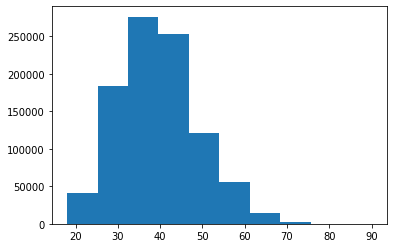

In [124]:
plt.hist(data_df['age'])
plt.show

### For now : drop nan vendor

In [126]:
data_df.dropna(subset=['vendor'],inplace=True)

## Creat the tmp with vendor, title, product and tags for the NLP

In [132]:
data_df['tmp_NLP']= data_df['vendor']+' '+data_df['title']+' '+data_df['product_type']+' '+data_df['tags']

In [134]:
data_df['tmp_NLP']

39                                                      NaN
91                                                      NaN
155                                                     NaN
688                                                     NaN
1132                                                    NaN
                                ...                        
964428    Giuseppe Zanotti-Online Blabber Men Sneakers -...
964429    ChampionDec-Online Champion Sweater/Hoodie - N...
964430    ChampionDec-Online Champion Sweater/Hoodie - N...
964431    ChampionDec-Online Champion 3P Socks - Black S...
964432    Giuseppe Zanotti-Online Basic Ladies Sandals -...
Name: tmp_NLP, Length: 812481, dtype: object

In [127]:
for column in data_df.columns:
    print(f'NA values in {column} : {round(data_df[column].isnull().sum()/len(data_df)*100,2)}%')

NA values in order_ID : 0.0%
NA values in item_ID : 0.0%
NA values in date : 0.0%
NA values in price : 0.0%
NA values in quantity : 0.0%
NA values in discount : 0.0%
NA values in final_price : 0.0%
NA values in vendor : 0.0%
NA values in title : 0.0%
NA values in product_type : 20.67%
NA values in tags : 30.54%
NA values in customer_ID : 0.0%
NA values in gender : 0.0%
NA values in age : 0.0%
NA values in nationality : 0.0%
NA values in premium_status : 0.0%
NA values in district : 0.0%
